# Part 1 - MRL Eyes Dataset Data Exploration
## Particularly with focus on "Eye State"

**URL**: http://mrl.cs.vsb.cz/eyedataset

In [124]:
from pathlib import Path
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
import pandas as pd
from collections import Counter
from tqdm import tqdm
import numpy as np
import seaborn as sns
sns.set()

In [69]:
data_path = Path(r"C:\dev\datasets\mrlEyes_2018_01")
data_path.exists()

True

In [73]:
image_files = [x for x in data_path.rglob("*.png")]
len(image_files)
f"Total number of images {len(image_files)}"

'Total number of images 84898'

### How the data is annotated?
subject ID:
xxx

image number:
xxx

gender:
0 - male
1 - famale

glasses:
0 - no
1 - yes

eye state:
0 - close
1 - open

reflections:
0 - none
1 - low
2 - high

lighting conditions/image quality:
0 - bad
1 - good

sensor type:
01 - RealSense SR300 640x480
02 - IDS Imaging, 1280x1024
03 - Aptina Imagin 752x480

example:
s001_00123_0_0_0_0_0_01.png


In [74]:
data = defaultdict(list)
pattern = re.compile(
    r"(?P<id>\S{5})_(?P<image_num>\d+)_(?P<gender>\d{1})_(?P<glasses>\d{1})_(?P<eye_state>\d{1})_(?P<reflection>\d{1})_(?P<lighting>\d{1})_(?P<sensor>\d{2})"
)
for fname in image_files:
    match = pattern.match(fname.name)
    data["filename"].append(fname)
    data["eye_state"].append(int(match.group("eye_state")))
df = pd.DataFrame(data)
df.head()

,filename,eye_state
0,C:\dev\datasets\mrlEyes_2018_01\s0001\s0001_00...,0
1,C:\dev\datasets\mrlEyes_2018_01\s0001\s0001_00...,0
2,C:\dev\datasets\mrlEyes_2018_01\s0001\s0001_00...,0
3,C:\dev\datasets\mrlEyes_2018_01\s0001\s0001_00...,0
4,C:\dev\datasets\mrlEyes_2018_01\s0001\s0001_00...,0


### Some of sample images from this dataset

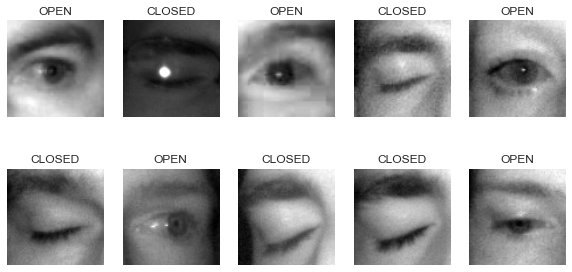

In [130]:
samples = df.sample(n=10, replace=False, random_state=42)
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)
axes = axes.flatten()
for idx, ax in enumerate(axes):
    sample = samples.iloc[idx]
    eye_state = "CLOSED" if sample.eye_state == 0 else "OPEN"
    img = imageio.imread(sample.filename)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(eye_state)
plt.show()

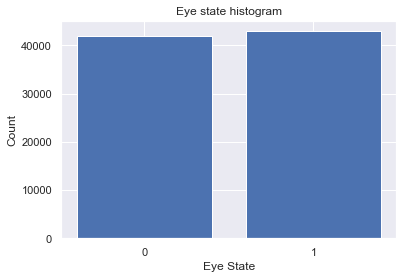

In [129]:
eye_state_dict = Counter(df.eye_state)
plt.bar(eye_state_dict.keys(), eye_state_dict.values())
plt.xticks([0, 1])
plt.xlabel("Eye State")
plt.ylabel("Count")
plt.title("Eye state histogram")
plt.show()

In [ ]:
img = imageio.imread(image_files[0])
np.max(img), np.min(img), np.mean(img), np.std(img)

In [148]:
image_info = defaultdict(list)
for fname in tqdm(image_files):
    img_data = imageio.imread(fname)
    height, width = img_data.shape
    image_info["mean_gray_value"] = np.mean(np.ravel(img_data))
    image_info["std_gray_value"] = np.std(np.ravel(img_data))
    image_info["height"].append(height)
    image_info["width"].append(width)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 84898/84898 [02:03<00:00, 684.72it/s]


### Check the image dimensions

In [149]:
df['height'] = image_info['height']
df['width'] = image_info['width']
df['image_mean'] = image_info['mean_gray_value']
df['image_std'] = image_info['std_gray_value']

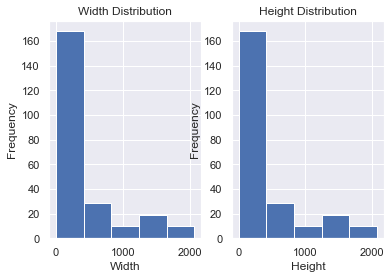

In [144]:
figure, axes = plt.subplots(1, 2)
df.groupby('height')['height'].count().plot.hist(bins=5, ax=axes[1])
df.groupby('width')['width'].count().plot.hist(bins=5, ax=axes[0])
axes[0].set_title('Width Distribution')
axes[0].set_xlabel('Width')

axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height')
plt.show()

### Grayscale value distribution

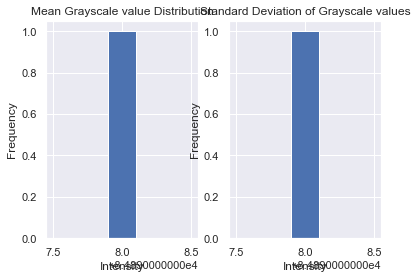

In [150]:
figure, axes = plt.subplots(1, 2)
df.groupby('image_mean')['image_mean'].count().plot.hist(bins=5, ax=axes[1])
df.groupby('image_std')['image_std'].count().plot.hist(bins=5, ax=axes[0])
axes[0].set_title('Mean Grayscale value Distribution')
axes[0].set_xlabel('Intensity')

axes[1].set_title('Standard Deviation of Grayscale values')
axes[1].set_xlabel('Intensity')
plt.show()

In [152]:
df.image_std

0        14.29669
1        14.29669
2        14.29669
3        14.29669
4        14.29669
           ...   
84893    14.29669
84894    14.29669
84895    14.29669
84896    14.29669
84897    14.29669
Name: image_std, Length: 84898, dtype: float64

### Summary
It is a very balanced data set for classification.

* But the images needs to be rescaled to same dimension